<a href="https://colab.research.google.com/github/palak373/EDA-Capstone-Hotel-Analysis/blob/main/Hotel_analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open In Colab
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings



Mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the CSV file

In [4]:
hotel_df = (pd.read_csv('/content/drive/MyDrive/project EDA/Hotel Bookings.csv'))

In [5]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
hotel_df = pd.read_csv('/content/drive/MyDrive/project EDA/Hotel Bookings.csv')

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Creating a copy of the main dataframe

In [7]:
# Creating a copy of hotel_df
hotl_df = hotel_df.copy()
hotl_df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


For better understanding we will see what are the unique values attained by the each column

In [8]:
hotl_df['hotel'].unique

<bound method Series.unique of 0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object>

In [10]:
hotl_df['is_canceled'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64>

In [11]:
hotl_df['meal'].unique

<bound method Series.unique of 0         BB
1         BB
2         BB
3         BB
4         BB
          ..
119385    BB
119386    BB
119387    BB
119388    BB
119389    HB
Name: meal, Length: 119390, dtype: object>

In [12]:
hotl_df['country'].unique

<bound method Series.unique of 0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object>

In [13]:
hotl_df['children'].unique

<bound method Series.unique of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64>

In [14]:
hotl_df['distribution_channel'].unique

<bound method Series.unique of 0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 119390, dtype: object>

In [ ]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
hotel_df.shape

(119390, 32)

1.REMOVE DUPLICATE VALUES

2.HANDLING MISSING VALUES

4.ADDING NEW IMPORTANT COLUMNS


In [ ]:
# Dispaly duplicate Values in a dataset
hotl_df[hotl_df.duplicated()].shape


(31994, 32)

In [ ]:
hotl_df.drop_duplicates(inplace = True) # Dropping the duplicate values from a dataset

In [ ]:
hotl_df.shape

(87396, 32)

In [ ]:
# Handling the missing values
hotl_df.isnull().sum().sort_values(ascending = False)


company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
#Fill the rows with some values

In [ ]:
hotl_df.shape

(87396, 32)

In [ ]:
# Filling the missing values
hotl_df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
hotl_df['children'].unique()

array([ 0.       ,  1.       ,  2.       , 10.       ,  3.       ,
        0.1038899])

Finding the null values


In [ ]:
nan_values = hotl_df.isna()
nan_counts =nan_values.sum()
print("Columns with NAN values")
for column, count in nan_counts.items():
  if count > 0:
    print(f"{column}: {count} NAN value(s)")

Columns with NAN values
country: 488 NAN value(s)
agent: 16340 NAN value(s)
company: 112593 NAN value(s)


Since there are may be the cases where customers didn't booked the hotel with any agent or any company so values may be null in that case. Replacing those null values with 0

In [ ]:
fill_value= 0
fill_columns = ['company','agent']
hotl_df[fill_columns]=hotl_df[fill_columns].fillna(0)

hotl_df['company'].unique()


array([  0., 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So NAN values will be replaced with the mean of data children


In [ ]:
hotl_df['children'].fillna(hotl_df['children'].mean(),inplace=True)


Values representation after filling the NAN values

In [ ]:
hotl_df['children'].unique()

array([ 0.       ,  1.       ,  2.       , 10.       ,  3.       ,
        0.1038899])

**As we saw there are null values in columns(agent, children,company). we are replacing missing values**

In [ ]:
zero_rows = hotl_df[(hotl_df[['adults', 'babies', 'children']] == 0).all(axis=1)]
print(zero_rows)

               hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November     

Droping the values which are 0

In [ ]:
hotl_df.drop(hotl_df[hotl_df['adults']+hotl_df['babies']+hotl_df['children']==0].index, inplace=True)
hotl_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotl_df.shape

(87230, 32)

In [ ]:
hotl_df['adults']

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 87230, dtype: int64

In [ ]:
hotl_df.drop(hotl_df.index[(hotl_df[['adults', 'babies', 'children']] == 0).all(axis=1)])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# EDA PROJECT REPRESENTATION

Taking out the unique values of the year and plotting the values according to their percentage

In [ ]:
hotl_df['arrival_date_year'].unique()



array([2015, 2016, 2017])

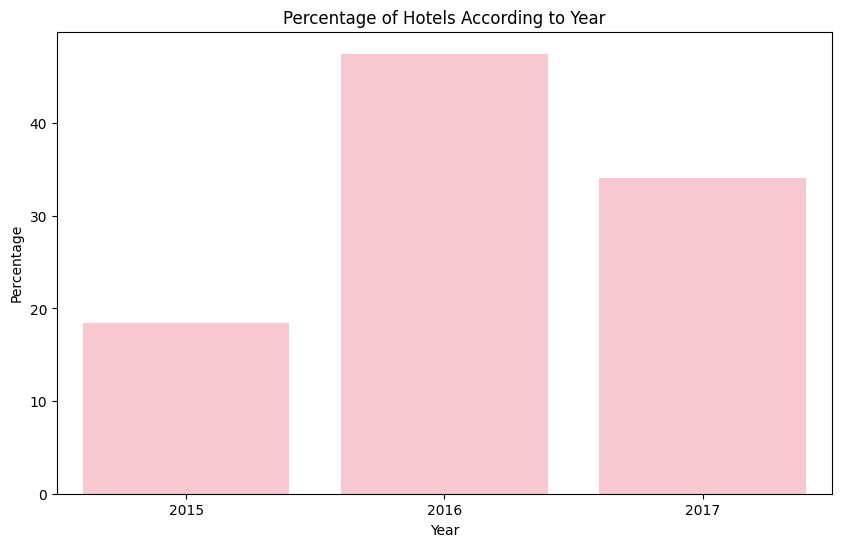

In [ ]:
hotel_counts = hotl_df['arrival_date_year'].value_counts()
hotel_percentages = (hotel_counts / hotel_counts.sum()) * 100

# Create a DataFrame with the year and their percentages
data = pd.DataFrame({'Year': hotel_percentages.index, 'Percentage': hotel_percentages.values})

# Sort the dataframe by year
data = data.sort_values('Year')
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Percentage', data=data, color='pink',)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Hotels According to Year')

# Display the plot
plt.show()





In [ ]:
hotl_df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
hotl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Pie chart showing the total percentage of the hotels booked monthwise by the total customers

In [ ]:
hotel_booked = hotl_df.groupby('arrival_date_month')['total_pass'].sum().reset_index()
hotel_booked.rename(columns = {'adults' : 'sum_adults'},inplace = True)
hotel_booked

,arrival_date_month,total_pass
0,April,22000.0
1,August,30762.0
2,December,13196.0
3,February,15299.0
4,January,10524.0
5,July,27607.0
6,June,21481.0
7,March,18432.0
8,May,22456.0
9,November,11812.0


In [ ]:
hotl_df['Total_stay'] = hotl_df['stays_in_weekend_nights']+hotl_df['stays_in_week_nights']


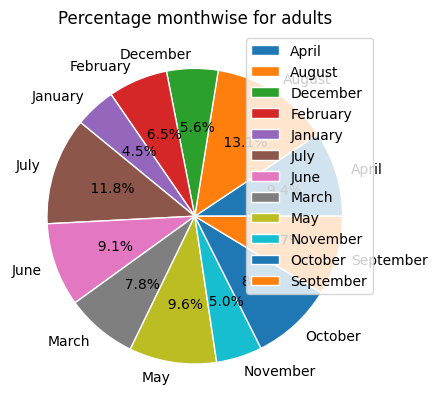

In [ ]:
hotel_booked.plot(kind='pie', y='total_pass', labels=hotel_booked['arrival_date_month'], autopct='%5.1f%%' ,startangle=360, wedgeprops={'edgecolor': 'white'})

# Set title and remove y-axis label
plt.title('Percentage monthwise for adults')
plt.ylabel('')

# Display the pie chart
plt.show()

Plotting a heatmap for numerical data and for correlation

In [ ]:
num_df1 = hotl_df[['lead_time','previous_cancellations','is_canceled','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','Total_stay','total_pass']]


Text(0.5, 1.0, 'Correlation')

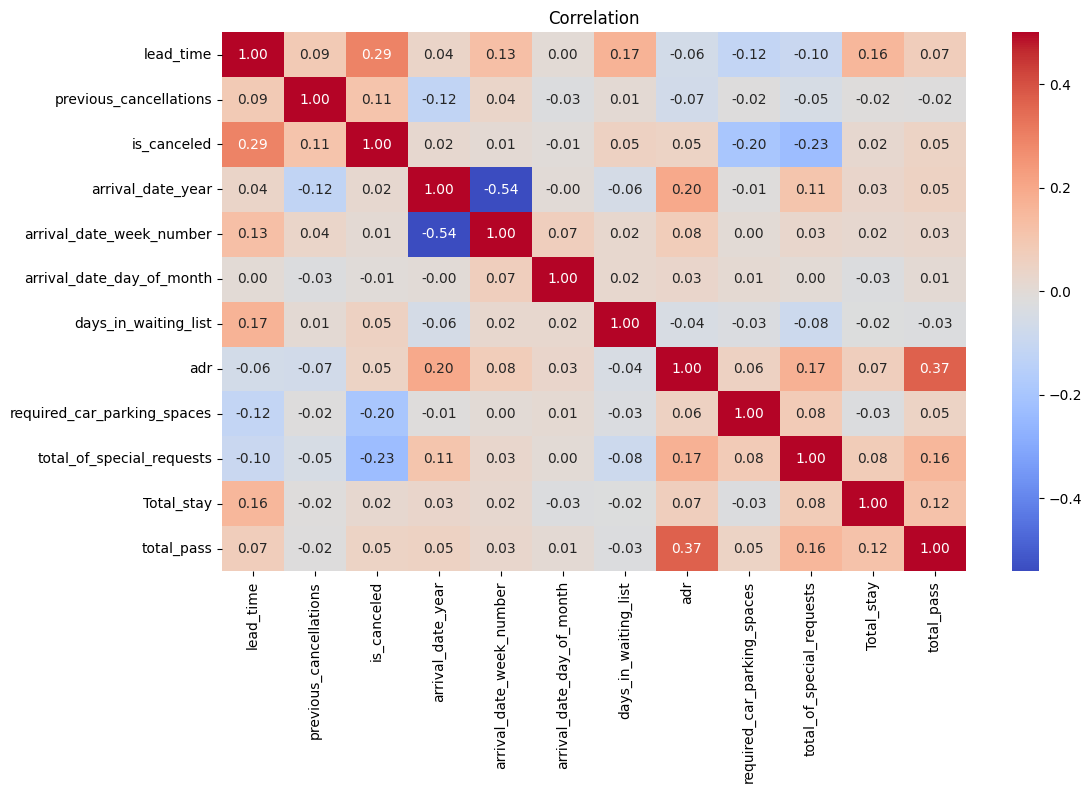

In [ ]:
corr_mat = num_df1.corr()
f,ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr_mat, annot = True , cmap = 'coolwarm', fmt = '.2f', vmax=.5)
plt.title('Correlation')

What is the total stay of all the passengers monthwise

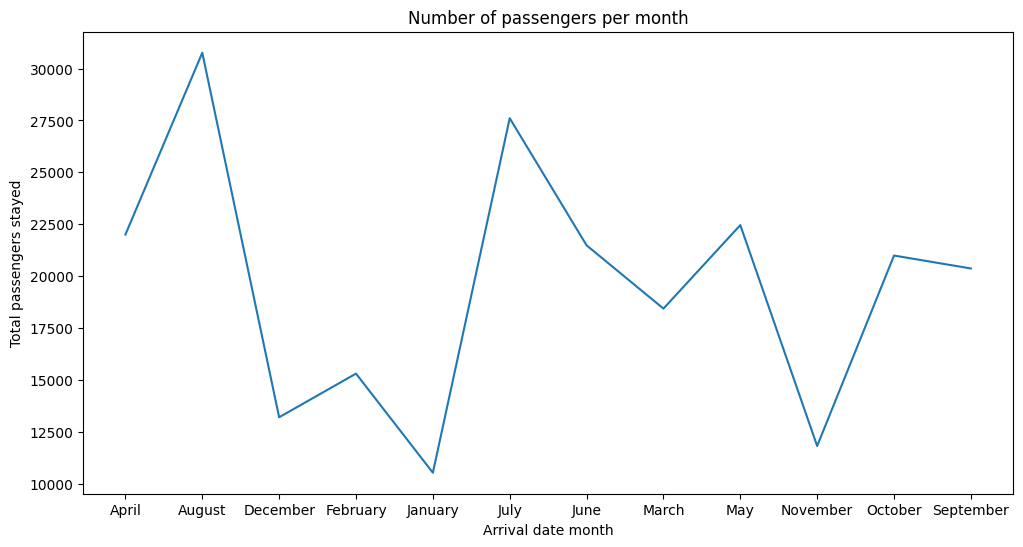

In [ ]:
Total_pax_stayed = hotl_df.groupby('arrival_date_month')['total_pass'].sum().reset_index()
Total_pax_stayed.rename(columns = {'total_pass' : 'sum_total_pass'},inplace=True)
Total_pax_stayed.head(12)
x = Total_pax_stayed['arrival_date_month']
y = Total_pax_stayed['sum_total_pass']
plt.figure(figsize = (12,6))
plt.plot(x, y)
plt.xlabel('Arrival date month')
plt.ylabel('Total passengers stayed')
plt.title('Number of passengers per month')
plt.show()

Scatterplot showing the total stay as per the customer type

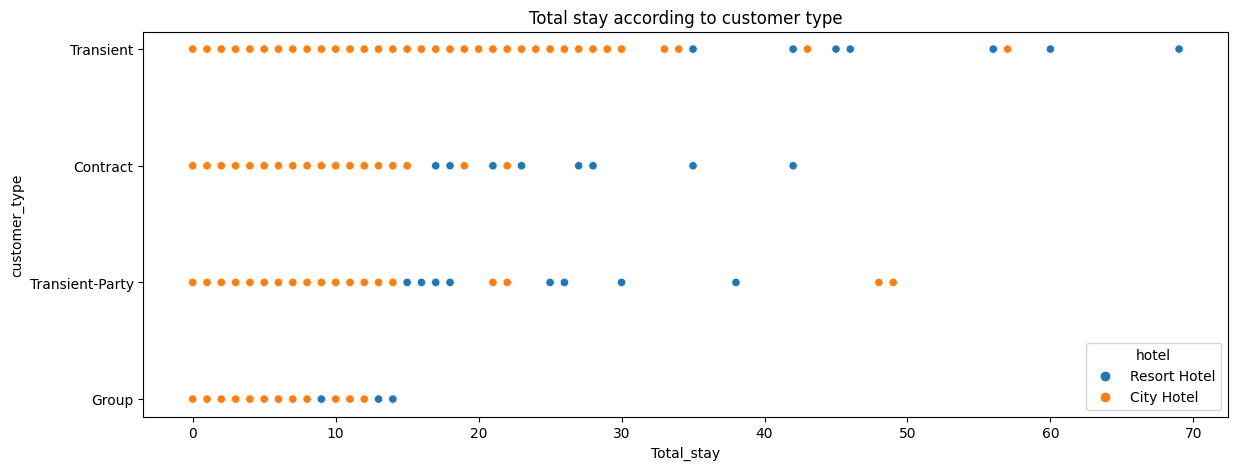

In [ ]:
plt.figure(figsize = (14,5))
sns.scatterplot(data = hotl_df, x="Total_stay", y="customer_type" ,hue = "hotel")
plt.title("Total stay according to customer type")
plt.show()

In [ ]:
hotl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Visit of customers to the hotel from different countries

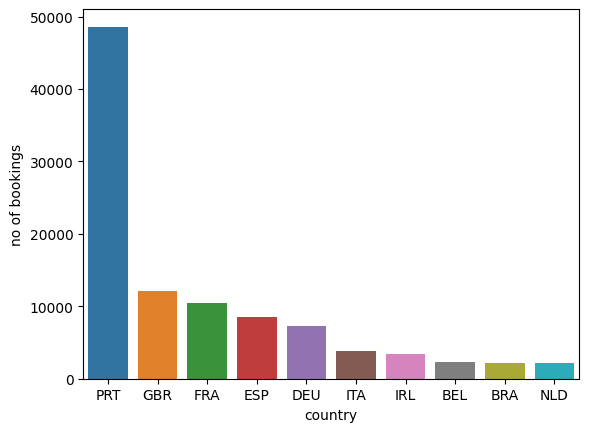

In [ ]:
grp_by_country = hotl_df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no of bookings'}).sort_values('no of bookings' ,ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no of bookings'])
plt.show()

Conclusion drawn from above plot is that the customers from PRT country has visited the hotel the most

Which room type is in most demand and which room type generatest highest adr?

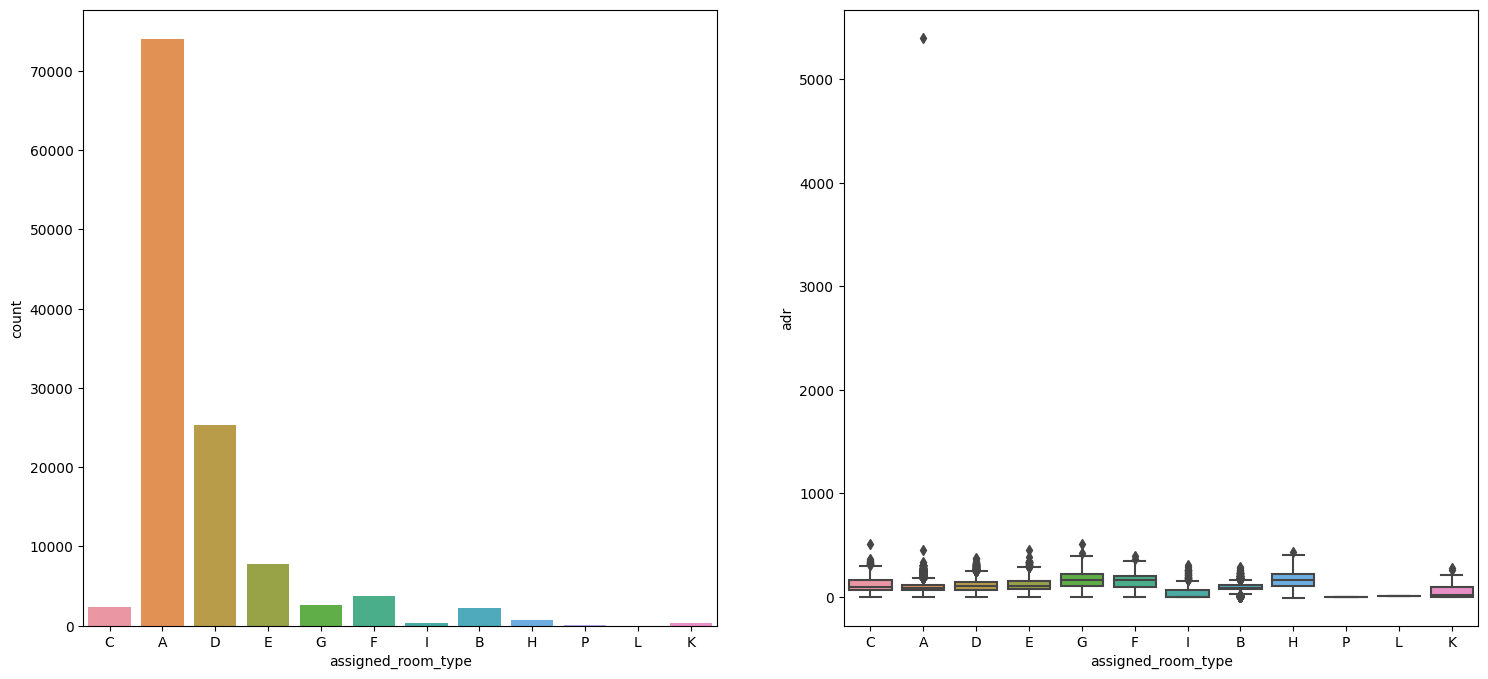

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hotl_df.groupby('assigned_room_type')
hotl_df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hotl_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = hotl_df['assigned_room_type'], y = hotl_df['adr'])
plt.show()

In [ ]:
hotl_df['total_pass'] = hotl_df['adults'] + hotl_df['children'] + hotl_df['babies']
hotl_df['total_pass']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_pass, Length: 119390, dtype: float64

In [ ]:
hotl_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
hotl_df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

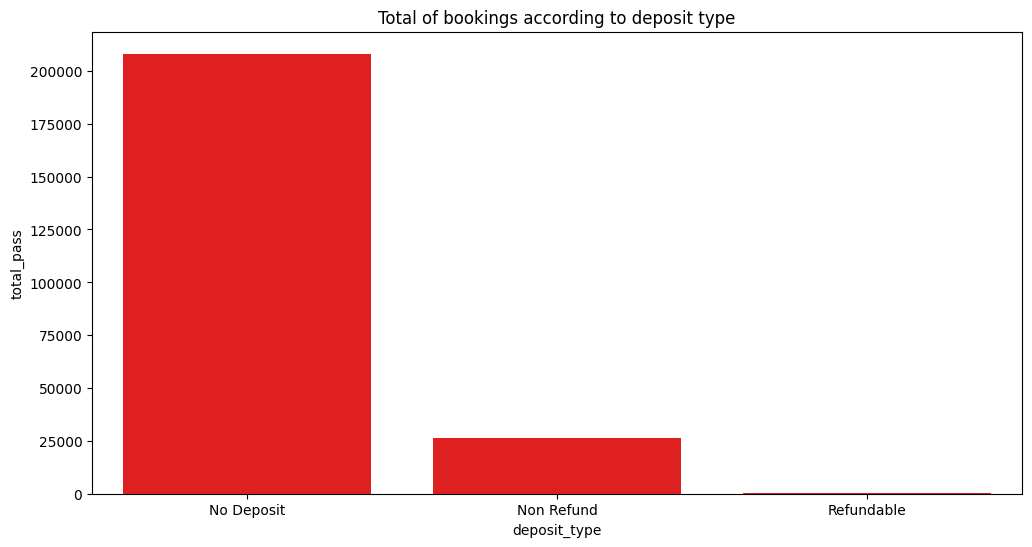

In [ ]:
hotel_deposit = hotl_df.groupby('deposit_type')['total_pass'].sum().reset_index()
hotel_deposit.rename(columns = {'total_pass' : 'sum_total_pass'},inplace = True)

plt.figure(figsize=(12, 6))
sns.barplot(x=hotel_deposit['deposit_type'], y=hotel_deposit['sum_total_pass'], data=hotel_deposit, color='red')

# Set labels and title
plt.xlabel('deposit_type')
plt.ylabel('total_pass')
plt.title('Total of bookings according to deposit type')
plt.show()

Scatterplot showing the room categories booked by the passengers

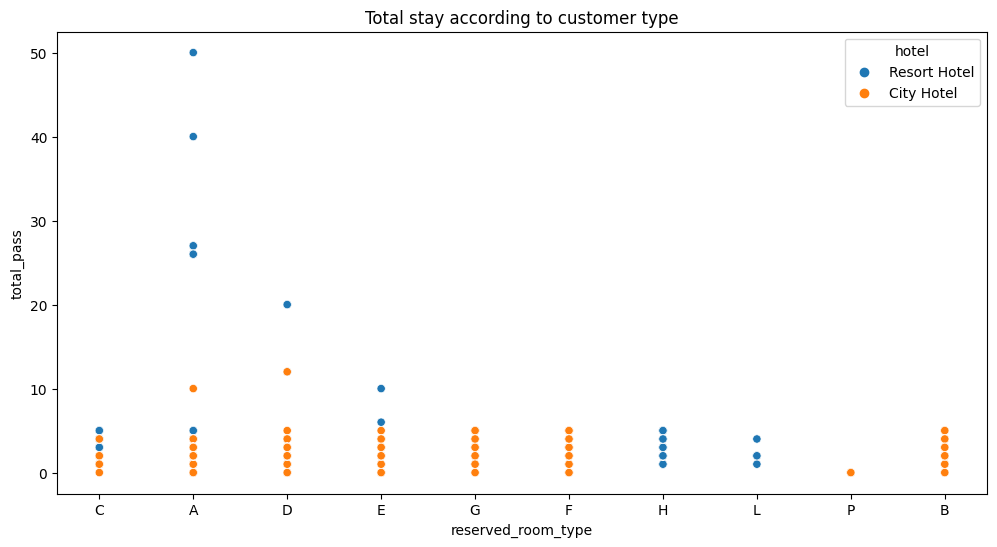

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = hotl_df, x="reserved_room_type", y="total_pass" ,hue = "hotel")
plt.title("Total stay according to customer type")
plt.show()

In [ ]:
hotl_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
hotl_df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
hotl_df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

Using groupby to plot the data according to distribution channel used by the total customers using a line plot

In [ ]:
distribution_mode = hotl_df.groupby('distribution_channel')['total_pass'].sum().reset_index()
distribution_mode.rename(columns ={'total_pass' : 'sum_total_pass'},inplace = True)
distribution_mode.head()


,distribution_channel,sum_total_pass
0,Corporate,8896.0
1,Direct,29630.0
2,GDS,210.0
3,TA/TO,196240.0
4,Undefined,3.0


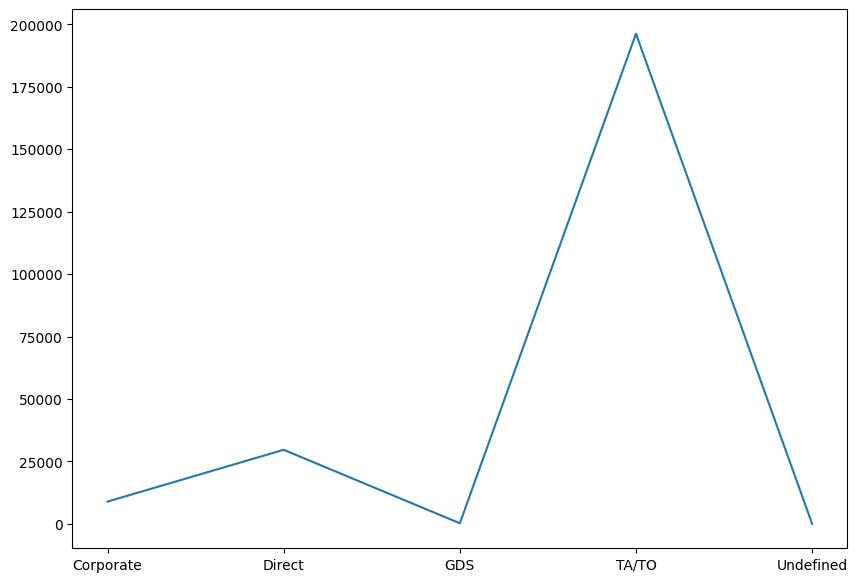

In [ ]:
x = distribution_mode['distribution_channel']
y = distribution_mode['sum_total_pass']
plt.figure(figsize = (10,7))
plt.plot(x,y)
plt.show()

In this plot it is concluded that the channel TA/TO has been used as the means of distribution channel the the customers

Bar plot showing the reservation status of the customers

In [ ]:
reserve_status = hotl_df.groupby('reservation_status')['total_pass'].sum().reset_index()
reserve_status.rename(columns ={'total_pass' : 'sum_total_pass'},inplace = True)
reserve_status.head(20)


,reservation_status,sum_total_pass
0,Canceled,86759.0
1,Check-Out,146007.0
2,No-Show,2158.0


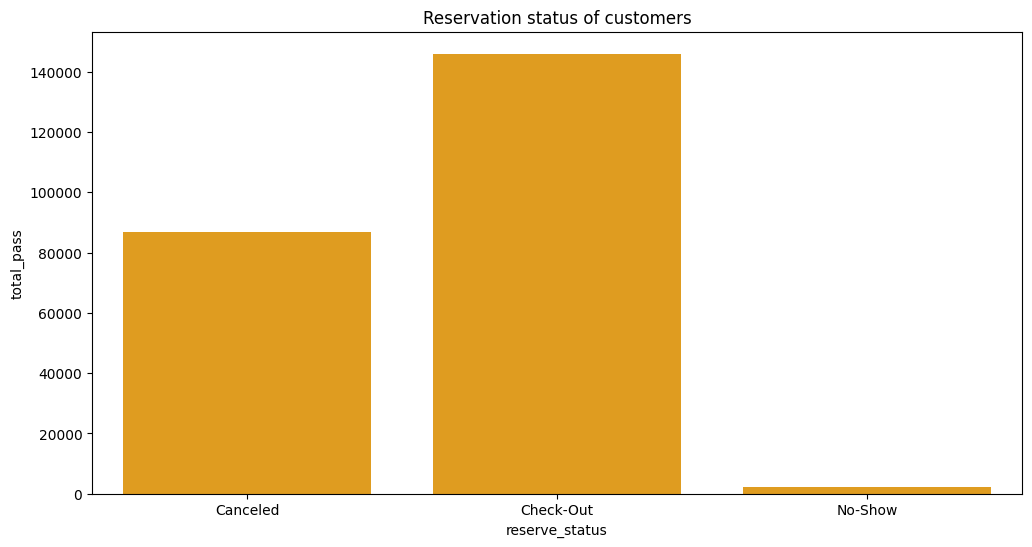

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=reserve_status['reservation_status'], y=reserve_status['sum_total_pass'], data=reserve_status, color='orange')

# Set labels and title
plt.xlabel('reserve_status')
plt.ylabel('total_pass')
plt.title('Reservation status of customers')
plt.show()

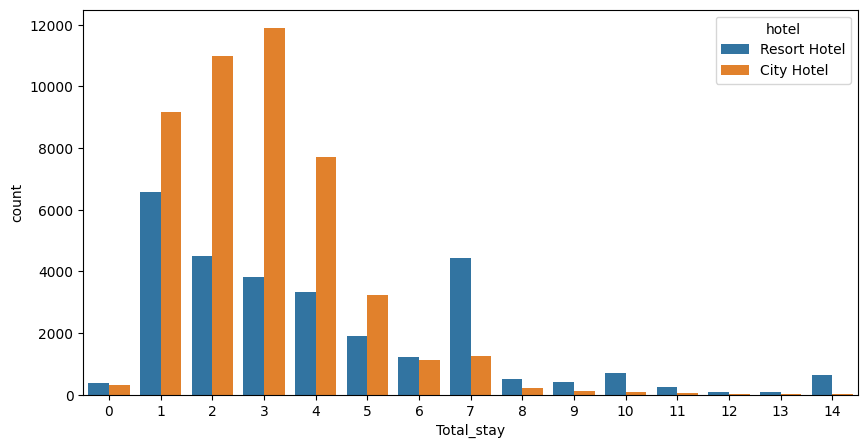

In [ ]:
not_cancelled = hotl_df[hotl_df['is_canceled'] == 0]
s1 = not_cancelled[not_cancelled['Total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Total_stay'], hue = s1['hotel'])
plt.show()

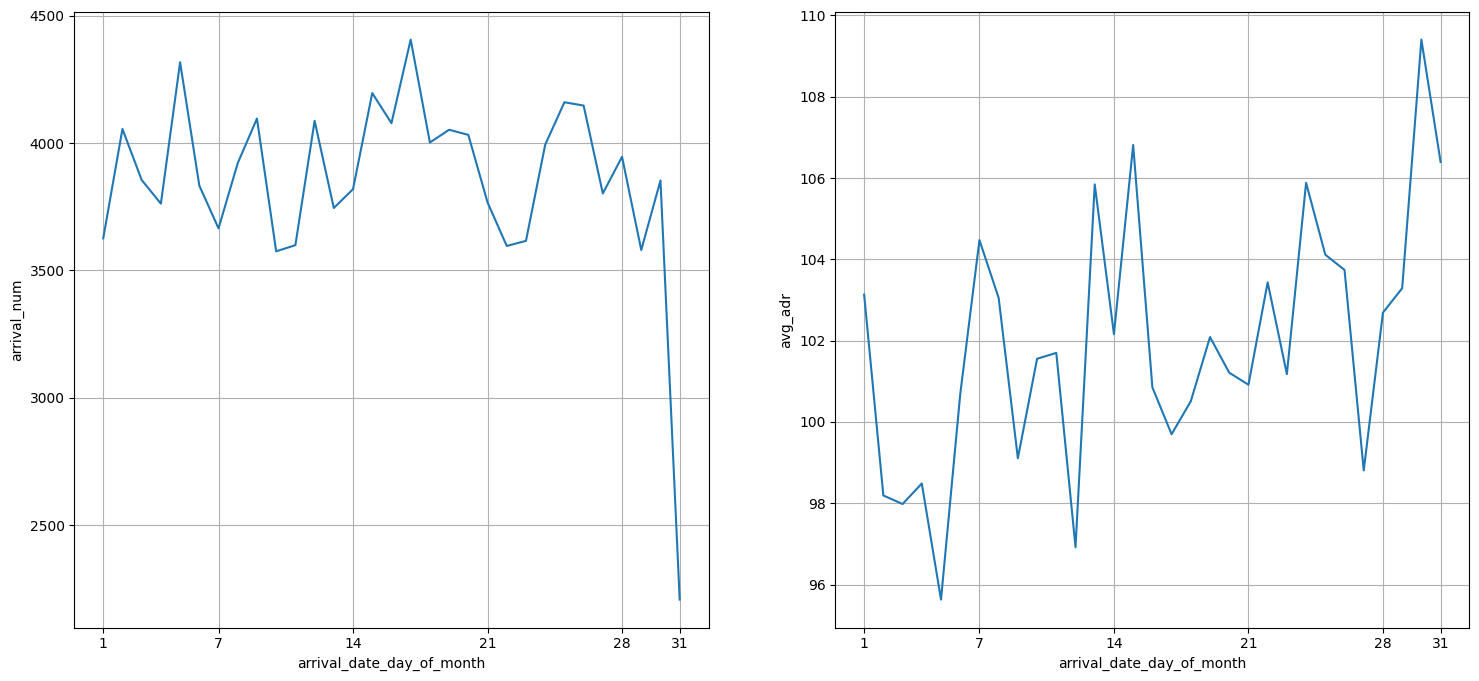

In [ ]:
d6=pd.DataFrame(hotl_df.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'arrival_num'})
d6['avg_adr'] = hotl_df.groupby('arrival_date_day_of_month')['adr'].mean()
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g= sns.lineplot(ax = axes[0],x = d6.index, y = d6['arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h= sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])

#show the plot
plt.show()

Percentage bookings of the hotel

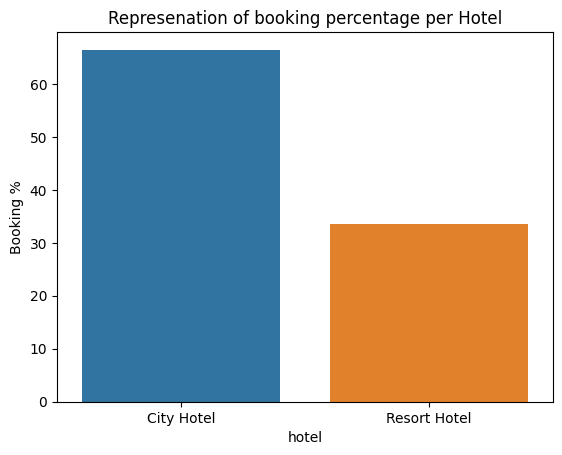

In [ ]:
grp_by_hotel = hotl_df.groupby('hotel')
d2=pd.DataFrame(grp_by_hotel.size()/hotl_df.shape[0]*100).reset_index().rename(columns = {0:'Booking %'})
sns.barplot(x=d2['hotel'],y=d2['Booking %'])
plt.title('Represenation of booking percentage per Hotel')
plt.show()


So it has been observed by the above plot that city hotel head been booked multiple times as comparative to Resort hotel